In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
respec_final = pd.read_csv('/content/gdrive/MyDrive/BigContest_data/respec_final_XGB.csv')
respec_final

,Unnamed: 0,application_id,user_id,gender,insert_time,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,reage,career,credit_grade
0,1,954900,553686,1.0,2022-06-07 14:29:03,30000000.0,개인사업자,정규직,기타가족소유,30000000.0,대환대출,0.0,1.0,1.0,27000000.0,50.0,16.0,3.0
1,2,137274,59516,1.0,2022-06-07 21:40:22,30000000.0,프리랜서,기타,기타가족소유,10000000.0,생활비,1.0,1.0,5.0,15000000.0,20.0,2.0,5.0
2,3,1570936,167320,1.0,2022-06-07 09:40:27,62000000.0,직장가입자(4대보험O),정규직,자가,2000000.0,생활비,1.0,1.0,7.0,344000000.0,30.0,6.0,4.0
3,4,967833,33400,1.0,2022-06-07 08:55:07,36000000.0,직장가입자(4대보험O),정규직,기타가족소유,5000000.0,생활비,0.0,0.0,1.0,16000000.0,20.0,2.0,6.0
4,6,1614045,860410,1.0,2022-06-07 11:29:05,45000000.0,기타소득,기타,자가,15000000.0,대환대출,1.0,0.0,1.0,20000000.0,40.0,6.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968748,1394211,1864587,489900,1.0,2022-03-22 14:55:32,25000000.0,프리랜서,기타,기타가족소유,5000000.0,사업자금,0.0,0.0,0.0,0.0,20.0,2.0,7.0
968749,1394212,1327066,151422,1.0,2022-03-22 01:19:24,20000000.0,기타소득,기타,자가,50000000.0,생활비,0.0,1.0,1.0,43500000.0,60.0,6.0,1.0
968750,1394213,1319606,173524,1.0,2022-03-22 07:34:32,75000000.0,직장가입자(4대보험O),정규직,자가,100000000.0,대환대출,1.0,1.0,8.0,200000000.0,40.0,14.0,5.0
968751,1394214,1482466,766546,1.0,2022-03-22 22:12:35,50000000.0,직장가입자(4대보험O),정규직,자가,10000000.0,대환대출,0.0,1.0,10.0,117000000.0,40.0,6.0,6.0


In [4]:
respec_final = respec_final.drop(['Unnamed: 0'], axis = 1)

In [5]:
respec_final.isnull().sum()

application_id                         0
user_id                                0
gender                                 0
insert_time                            0
yearly_income                          0
income_type                            0
employment_type                        0
houseown_type                          0
desired_amount                         0
purpose                                0
personal_rehabilitation_yn             0
personal_rehabilitation_complete_yn    0
existing_loan_cnt                      0
existing_loan_amt                      0
reage                                  0
career                                 0
credit_grade                           0
dtype: int64

In [6]:
! pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
from kmodes.kprototypes import KPrototypes
import plotly.express as px

In [8]:
data = respec_final.drop(columns=['application_id','user_id','insert_time'])

In [9]:
data

,gender,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,reage,career,credit_grade
0,1.0,30000000.0,개인사업자,정규직,기타가족소유,30000000.0,대환대출,0.0,1.0,1.0,27000000.0,50.0,16.0,3.0
1,1.0,30000000.0,프리랜서,기타,기타가족소유,10000000.0,생활비,1.0,1.0,5.0,15000000.0,20.0,2.0,5.0
2,1.0,62000000.0,직장가입자(4대보험O),정규직,자가,2000000.0,생활비,1.0,1.0,7.0,344000000.0,30.0,6.0,4.0
3,1.0,36000000.0,직장가입자(4대보험O),정규직,기타가족소유,5000000.0,생활비,0.0,0.0,1.0,16000000.0,20.0,2.0,6.0
4,1.0,45000000.0,기타소득,기타,자가,15000000.0,대환대출,1.0,0.0,1.0,20000000.0,40.0,6.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968748,1.0,25000000.0,프리랜서,기타,기타가족소유,5000000.0,사업자금,0.0,0.0,0.0,0.0,20.0,2.0,7.0
968749,1.0,20000000.0,기타소득,기타,자가,50000000.0,생활비,0.0,1.0,1.0,43500000.0,60.0,6.0,1.0
968750,1.0,75000000.0,직장가입자(4대보험O),정규직,자가,100000000.0,대환대출,1.0,1.0,8.0,200000000.0,40.0,14.0,5.0
968751,1.0,50000000.0,직장가입자(4대보험O),정규직,자가,10000000.0,대환대출,0.0,1.0,10.0,117000000.0,40.0,6.0,6.0


In [ ]:
cost = []
for cluster in range(3,7):
    print('{cluster}\.cluster start'.format(cluster=cluster))
    kproto = KPrototypes(n_clusters = cluster, init='Huang',n_init=10,verbose= True)
    kproto.fit(data, categorical= [0,2,3,4,6,7,8])
    cost.append(kproto.cost_)

In [10]:
kproto = KPrototypes(n_clusters = 5, init='Huang',n_jobs=-1,n_init=1,verbose=True)
kproto.fit(data, categorical=[0,2,3,4,6,7,8])
centroids = kproto.cluster_centroids_
labels  = kproto.labels_

In [11]:
data['Labels'] = labels

In [12]:
cluster1 = data[data['Labels']==0]
cluster2 = data[data['Labels']==1]
cluster3 = data[data['Labels']==2]
cluster4 = data[data['Labels']==3]
cluster4 = data[data['Labels']==4]

In [13]:
cluster1

,gender,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,reage,career,credit_grade,Labels
970,0.0,5.000000e+09,직장가입자(4대보험O),정규직,자가,2.000000e+07,생활비,0.0,0.0,0.0,0.0,70.0,11.0,5.0,0
3434,0.0,5.000000e+09,직장가입자(4대보험O),정규직,자가,3.000000e+07,생활비,1.0,0.0,0.0,0.0,40.0,20.0,4.0,0
3582,0.0,3.386000e+09,직장가입자(4대보험O),정규직,자가,1.300000e+08,전월세보증금,0.0,1.0,1.0,15000000.0,40.0,2.0,1.0,0
11208,0.0,5.000000e+09,직장가입자(4대보험O),정규직,자가,2.000000e+07,생활비,1.0,0.0,0.0,0.0,50.0,10.0,4.0,0
18599,1.0,5.000000e+09,개인사업자,정규직,자가,1.000000e+09,생활비,0.0,1.0,7.0,147000000.0,40.0,6.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955309,0.0,3.600000e+09,개인사업자,기타,전월세,1.000000e+07,대환대출,0.0,1.0,4.0,27000000.0,40.0,3.0,6.0,0
958083,1.0,4.000000e+09,직장가입자(4대보험O),정규직,전월세,2.000000e+09,생활비,1.0,0.0,3.0,84000000.0,50.0,2.0,7.0,0
962129,1.0,4.000000e+09,직장가입자(4대보험O),정규직,전월세,3.000000e+08,투자,1.0,1.0,4.0,433000000.0,40.0,1.0,3.0,0
963605,1.0,5.800000e+09,기타소득,기타,기타가족소유,1.000000e+06,생활비,0.0,1.0,1.0,43500000.0,50.0,7.0,5.0,0


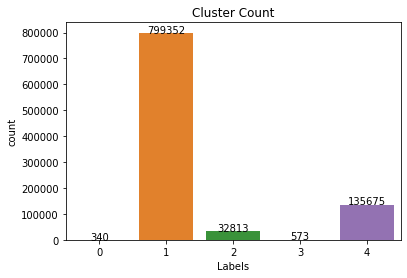

In [15]:
ax=sns.countplot(x=data.Labels)
for index, row in pd.DataFrame(data['Labels'].value_counts()).iterrows():
    ax.text(index,row.values[0], str(round(row.values[0])),color='black', ha="center")
    #print(index,row.values[0])
plt.title('Cluster Count')
plt.show()

In [17]:
centroids

array([['5626208823.529411', '494782352.9411765', '2.3588235294117648',
        '39047058.823529415', '45.588235294117645', '9.83529411764706',
        '5.2441176470588236', '0.0', '직장가입자(4대보험O)', '정규직', '자가', '생활비',
        '0.0', '1.0'],
       ['36140013.410862796', '21997334.0906134', '3.3075878961959186',
        '33497799.46756873', '35.025570712276945', '4.1473893854021755',
        '5.747239013601017', '1.0', '직장가입자(4대보험O)', '정규직', '전월세', '생활비',
        '0.0', '1.0'],
       ['83035047.0849968', '50767744.49151251', '7.343705238777314',
        '406264590.2538628', '39.89973486118307', '9.995184835278701',
        '4.9248773352025115', '1.0', '직장가입자(4대보험O)', '정규직', '자가', '생활비',
        '0.0', '1.0'],
       ['420328097.7312391', '6973816753.926702', '3.0959860383944156',
        '72419720.76788831', '38.18499127399651', '5.842931937172775',
        '5.054101221640488', '1.0', '직장가입자(4대보험O)', '정규직', '전월세', '생활비',
        '0.0', '1.0'],
       ['71430425.64953013', '82994789.0178

In [25]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_new = data.drop(columns=['income_type',	'employment_type',	'houseown_type', 'purpose'])
pca_transformed = pca.fit_transform(data_new)
pca_transformed

array([[ -8467445.36391094, -17145802.4306623 ],
       [-28549645.34177873, -15588820.6592263 ],
       [-25084956.41633313,  47475079.92534981],
       ...,
       [ 70610349.78517011,  33921506.7770181 ],
       [-23688437.87305497,  13577687.59148074],
       [-18307095.29661901, -13375352.13983494]])

In [26]:
data['pca_x'] = pca_transformed[:,0]
data['pca_y'] = pca_transformed[:,1]
data.head(3)

,gender,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,reage,career,credit_grade,Labels,pca_x,pca_y
0,1.0,30000000.0,개인사업자,정규직,기타가족소유,30000000.0,대환대출,0.0,1.0,1.0,27000000.0,50.0,16.0,3.0,1,-8.467445e+06,-1.714580e+07
1,1.0,30000000.0,프리랜서,기타,기타가족소유,10000000.0,생활비,1.0,1.0,5.0,15000000.0,20.0,2.0,5.0,1,-2.854965e+07,-1.558882e+07
2,1.0,62000000.0,직장가입자(4대보험O),정규직,자가,2000000.0,생활비,1.0,1.0,7.0,344000000.0,30.0,6.0,4.0,2,-2.508496e+07,4.747508e+07


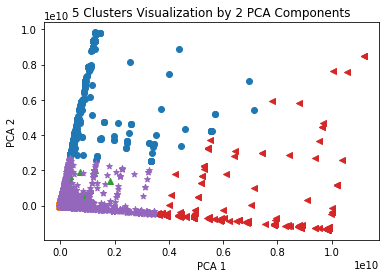

In [30]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = data[data['Labels']==0].index
marker1_ind = data[data['Labels']==1].index
marker2_ind = data[data['Labels']==2].index
marker3_ind = data[data['Labels']==3].index
marker4_ind = data[data['Labels']==4].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=data.loc[marker0_ind,'pca_x'], y=data.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=data.loc[marker1_ind,'pca_x'], y=data.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=data.loc[marker2_ind,'pca_x'], y=data.loc[marker2_ind,'pca_y'], marker='^')
plt.scatter(x=data.loc[marker3_ind,'pca_x'], y=data.loc[marker3_ind,'pca_y'], marker='<') 
plt.scatter(x=data.loc[marker4_ind,'pca_x'], y=data.loc[marker4_ind,'pca_y'], marker='*')


plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('5 Clusters Visualization by 2 PCA Components')
plt.savefig('test.png') 
plt.show()

## 스케일링 후

In [50]:
data = respec_final.drop(columns=['application_id','user_id','insert_time'])

In [51]:
from sklearn.preprocessing import PowerTransformer

In [52]:
for c in data.select_dtypes(exclude='object').columns:
    pt = PowerTransformer()
    data[c] =  pt.fit_transform(np.array(data[c]).reshape(-1, 1))

In [53]:
kproto2 = KPrototypes(n_clusters = 3, init='Huang',n_jobs=-1,n_init=1,verbose=True)
kproto2.fit(data, categorical=[0,2,3,4,6,7,8])
centroids2 = kproto2.cluster_centroids_
labels2  = kproto2.labels_

In [54]:
data['Labels'] = labels2

In [55]:
cluster1 = data[data['Labels']==0]
cluster2 = data[data['Labels']==1]
cluster3 = data[data['Labels']==2]

In [56]:
pca = PCA(n_components=2)
data_new = data.drop(columns=['income_type',	'employment_type',	'houseown_type', 'purpose'])
pca_transformed = pca.fit_transform(data_new)
pca_transformed

array([[ 1.17355262,  2.24420206],
       [-0.48457298, -0.14492496],
       [ 1.99447118, -0.2583145 ],
       ...,
       [ 2.97769112,  1.2433645 ],
       [ 2.15073673, -0.4014279 ],
       [-2.02608376,  1.50995154]])

In [57]:
data['pca_x'] = pca_transformed[:,0]
data['pca_y'] = pca_transformed[:,1]
data.head(3)

,gender,yearly_income,income_type,employment_type,houseown_type,desired_amount,purpose,personal_rehabilitation_yn,personal_rehabilitation_complete_yn,existing_loan_cnt,existing_loan_amt,reage,career,credit_grade,Labels,pca_x,pca_y
0,0.699955,-0.218550,개인사업자,정규직,기타가족소유,0.491106,대환대출,-0.838165,0.809063,-0.790838,0.053903,1.241716,1.717426,-1.612134,0,1.173553,2.244202
1,0.699955,-0.218550,프리랜서,기타,기타가족소유,-0.401264,생활비,1.193082,0.809063,0.631577,-0.207583,-1.549285,-0.615375,-0.624767,1,-0.484573,-0.144925
2,0.699955,0.768897,직장가입자(4대보험O),정규직,자가,-1.498532,생활비,1.193082,0.809063,1.025704,1.691686,-0.441694,0.799774,-1.185804,0,1.994471,-0.258314


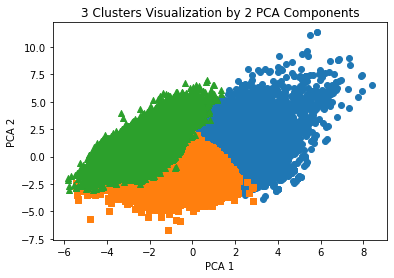

In [58]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = data[data['Labels']==0].index
marker1_ind = data[data['Labels']==1].index
marker2_ind = data[data['Labels']==2].index


# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=data.loc[marker0_ind,'pca_x'], y=data.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=data.loc[marker1_ind,'pca_x'], y=data.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=data.loc[marker2_ind,'pca_x'], y=data.loc[marker2_ind,'pca_y'], marker='^')


plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.savefig('test.png') 
plt.show()